## Importing Needed Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

%matplotlib inline

## Reading CSV file as weather_df and making date_time column as index of dataframe

In [2]:
weather_df = pd.read_csv('data/data.csv', parse_dates=['datetime'], index_col='datetime')
weather_df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2001-02-01,20.9,6.1,13.7,20.9,4.5,13.3,3.7,54.8,0.0,0.0,...,NaN,NaN,NaN,2001-02-01T07:09:26,2001-02-01T18:00:21,0.25,Clear,Clear conditions throughout the day.,clear-day,"4,218,209,999,942,180,000,000"
2001-02-02,20.3,6.1,13.7,20.3,4.1,13.3,3.5,53.4,0.0,0.0,...,NaN,NaN,NaN,2001-02-02T07:08:53,2001-02-02T18:01:10,0.30,Clear,Clear conditions throughout the day.,clear-day,"4,218,209,999,942,180,000,000"
2001-02-03,22.1,5.1,13.3,22.1,4.0,13.1,3.6,55.5,0.0,0.0,...,NaN,NaN,NaN,2001-02-03T07:08:18,2001-02-03T18:01:59,0.35,Clear,Clear conditions throughout the day.,clear-day,"4,218,209,999,942,180,000,000"
2001-02-04,22.4,5.1,13.8,22.4,5.1,13.8,5.5,61.6,0.0,0.0,...,NaN,NaN,NaN,2001-02-04T07:07:41,2001-02-04T18:02:47,0.40,Clear,Clear conditions throughout the day.,clear-day,"4,218,209,999,942,180,000,000"
2001-02-05,23.1,6.7,15.2,23.1,6.7,15.2,6.7,61.3,0.0,0.0,...,NaN,NaN,NaN,2001-02-05T07:07:04,2001-02-05T18:03:35,0.44,Clear,Clear conditions throughout the day.,clear-day,"4,218,209,999,942,180,000,000"


## Checking columns in our dataframe

In [3]:
weather_df.columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

### Removing unnessary columns

In [4]:
weather_df.drop(["precipprob","precipcover","preciptype","snow","snowdepth","windgust","winddir","solarradiation","solarenergy","uvindex","severerisk","sunrise","sunset","conditions","description","icon","stations"],axis=1,inplace=True)

In [5]:
weather_df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,moonphase
datetime,,,,,,,,,,,,,,
2001-02-01,20.9,6.1,13.7,20.9,4.5,13.3,3.7,54.8,0.0,25.9,1014.3,0.0,3.4,0.25
2001-02-02,20.3,6.1,13.7,20.3,4.1,13.3,3.5,53.4,0.0,27.7,1014.2,0.0,3.0,0.30
2001-02-03,22.1,5.1,13.3,22.1,4.0,13.1,3.6,55.5,0.0,23.8,1013.0,0.0,3.0,0.35
2001-02-04,22.4,5.1,13.8,22.4,5.1,13.8,5.5,61.6,0.0,11.2,1013.0,3.0,1.8,0.40
2001-02-05,23.1,6.7,15.2,23.1,6.7,15.2,6.7,61.3,0.0,13.0,1014.0,14.1,1.7,0.44


In [6]:
weather_df.shape

(8021, 14)

In [7]:
weather_df.dtypes

tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
windspeed           float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
moonphase           float64
dtype: object

In [8]:
weather_df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,moonphase
count,8021.000000,8021.000000,8021.000000,8021.000000,8021.000000,8021.000000,8021.000000,8021.000000,8021.000000,8021.000000,8017.000000,8021.000000,8021.000000,8021.000000
mean,31.573981,19.785052,25.435956,34.000349,20.457150,27.059220,15.817242,61.091596,2.545368,18.099514,1007.788761,32.405037,2.634347,0.501743
std,7.100590,7.752987,7.387114,9.349304,8.976697,9.096268,6.762230,17.758029,10.929756,7.808660,7.483563,28.218080,1.183270,0.307377
min,9.100000,0.100000,5.700000,7.900000,-5.500000,4.400000,-2.300000,15.060000,0.000000,0.000000,988.700000,0.000000,0.000000,0.000000
25%,26.400000,13.000000,19.100000,26.300000,13.000000,19.000000,10.200000,50.200000,0.000000,13.000000,1001.200000,5.000000,2.000000,0.250000
50%,33.000000,21.400000,27.600000,34.700000,21.400000,28.100000,14.700000,62.500000,0.000000,17.300000,1007.700000,27.500000,2.700000,0.500000
75%,36.400000,26.700000,31.100000,42.100000,26.600000,34.900000,22.600000,73.800000,0.124000,22.300000,1014.500000,55.300000,3.200000,0.750000
max,49.100000,34.800000,41.400000,57.900000,41.400000,47.900000,28.100000,99.300000,264.000000,236.900000,1024.200000,100.000000,19.800000,1.000000


## Checking is there any null values in dataset

In [9]:
weather_df.isnull().sum()

tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
windspeed           0
sealevelpressure    4
cloudcover          0
visibility          0
moonphase           0
dtype: int64

## Filling Null values

In [10]:
weather_df.fillna(weather_df["sealevelpressure"].mean(),inplace=True)

In [11]:
weather_df.isnull().sum()

tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
windspeed           0
sealevelpressure    0
cloudcover          0
visibility          0
moonphase           0
dtype: int64

## Ploting all the column values

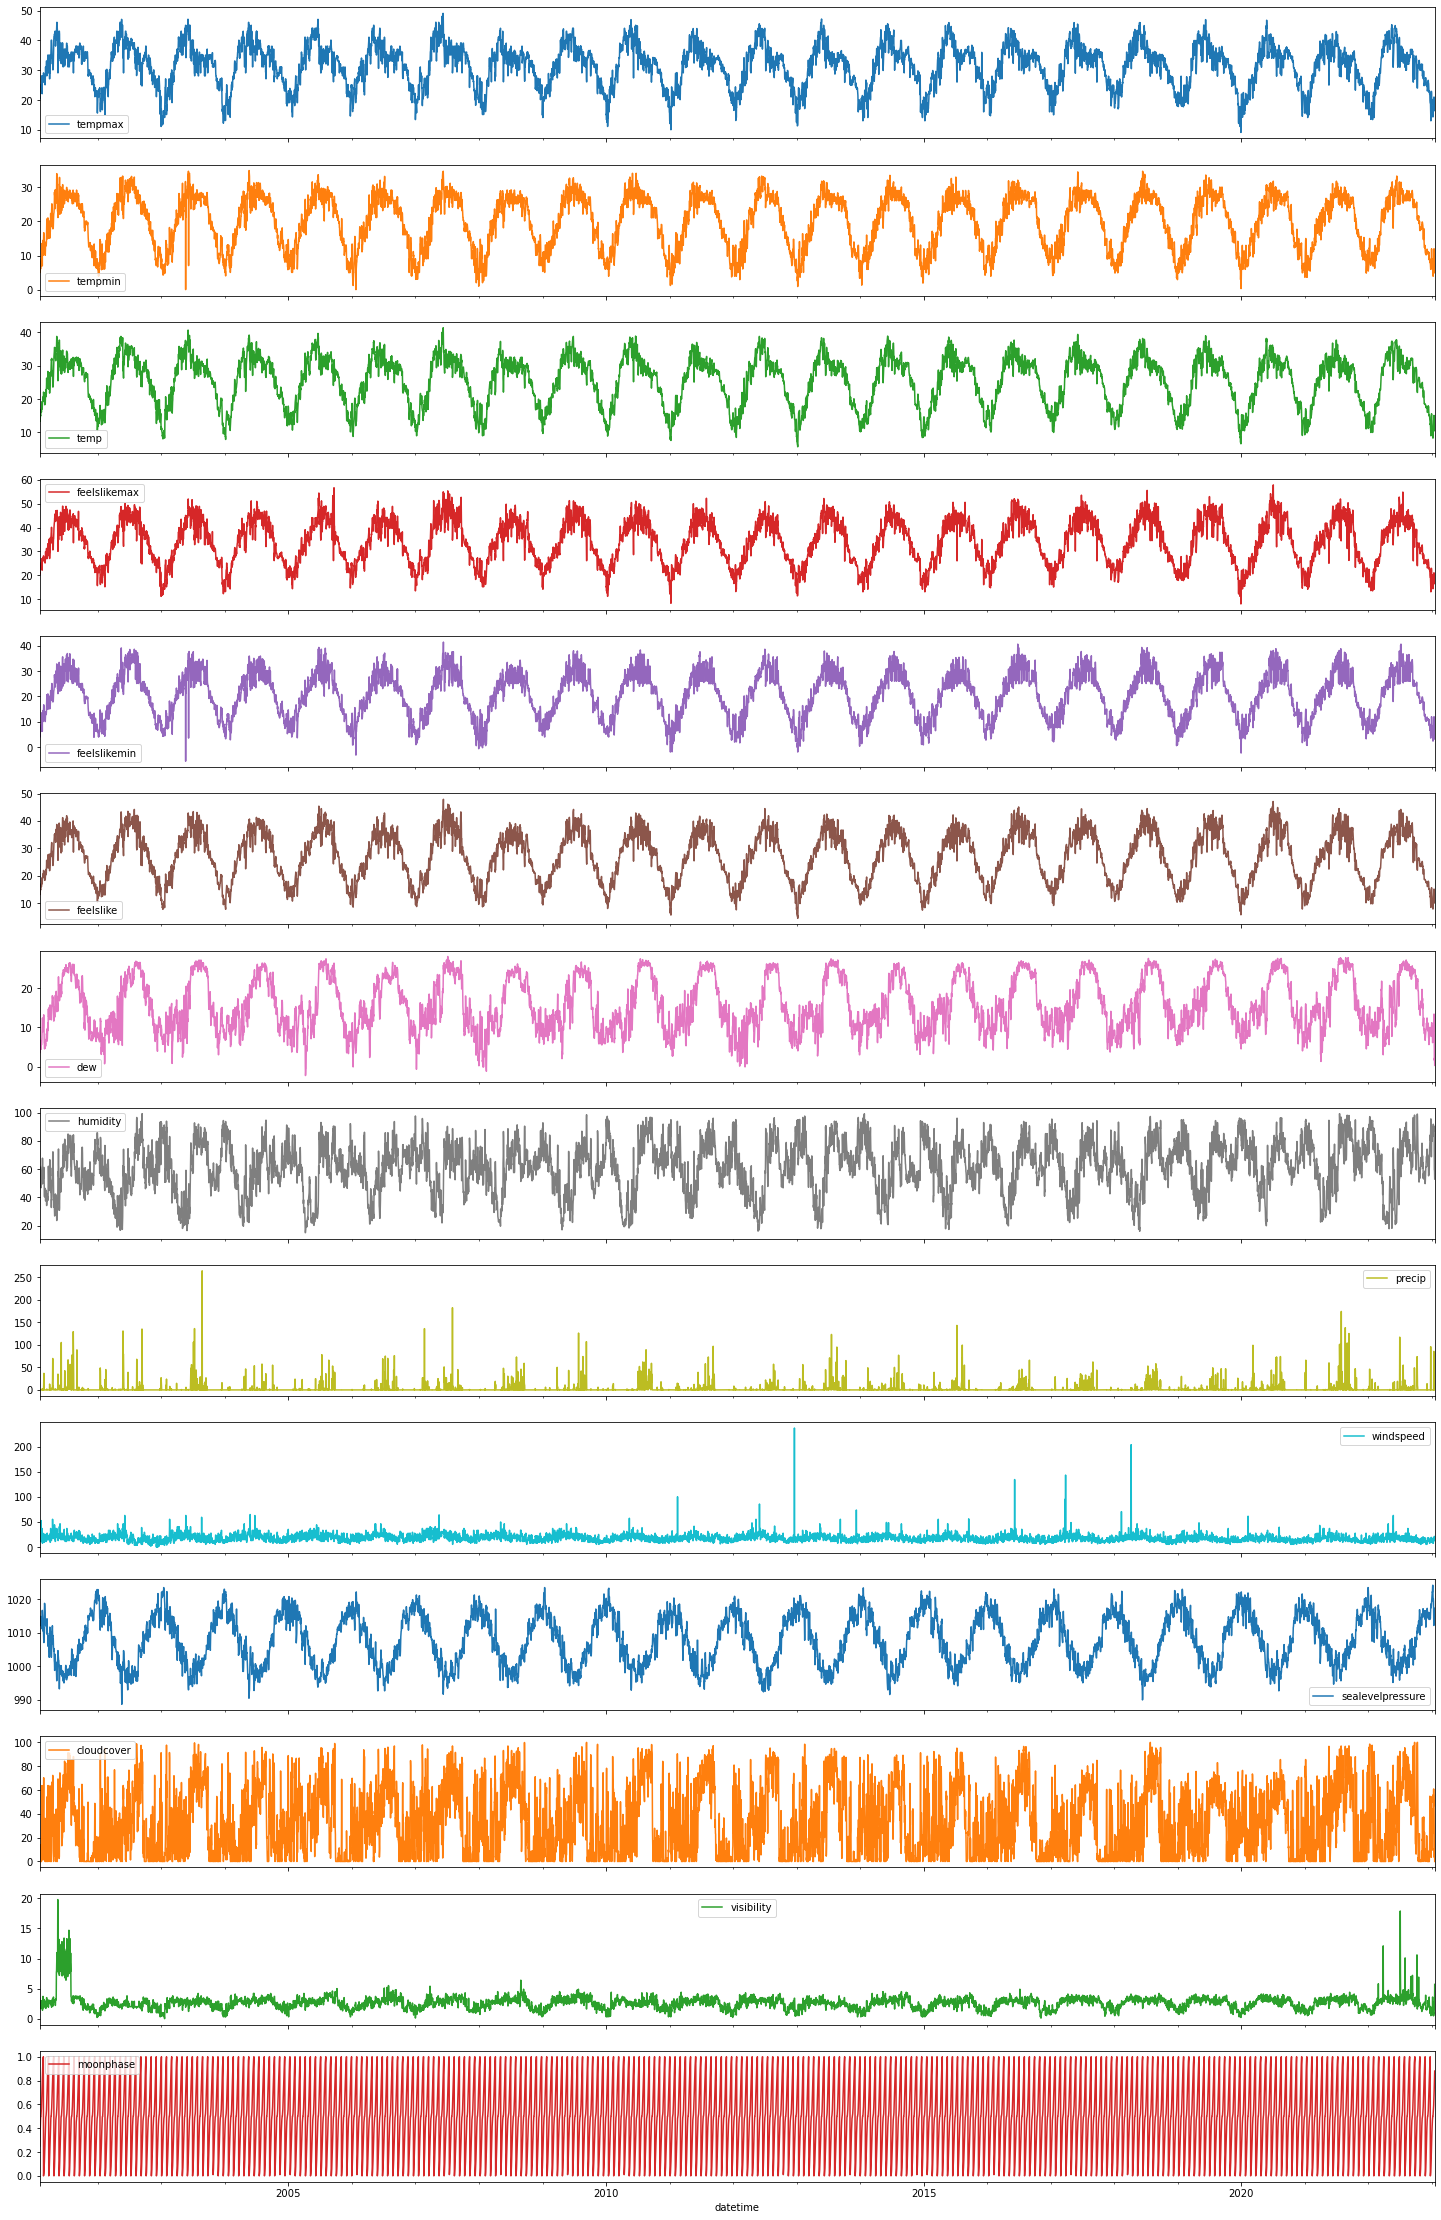

In [12]:
weather_df.plot(subplots=True, figsize=(25,40));

## Ploting all the column values for 1 year

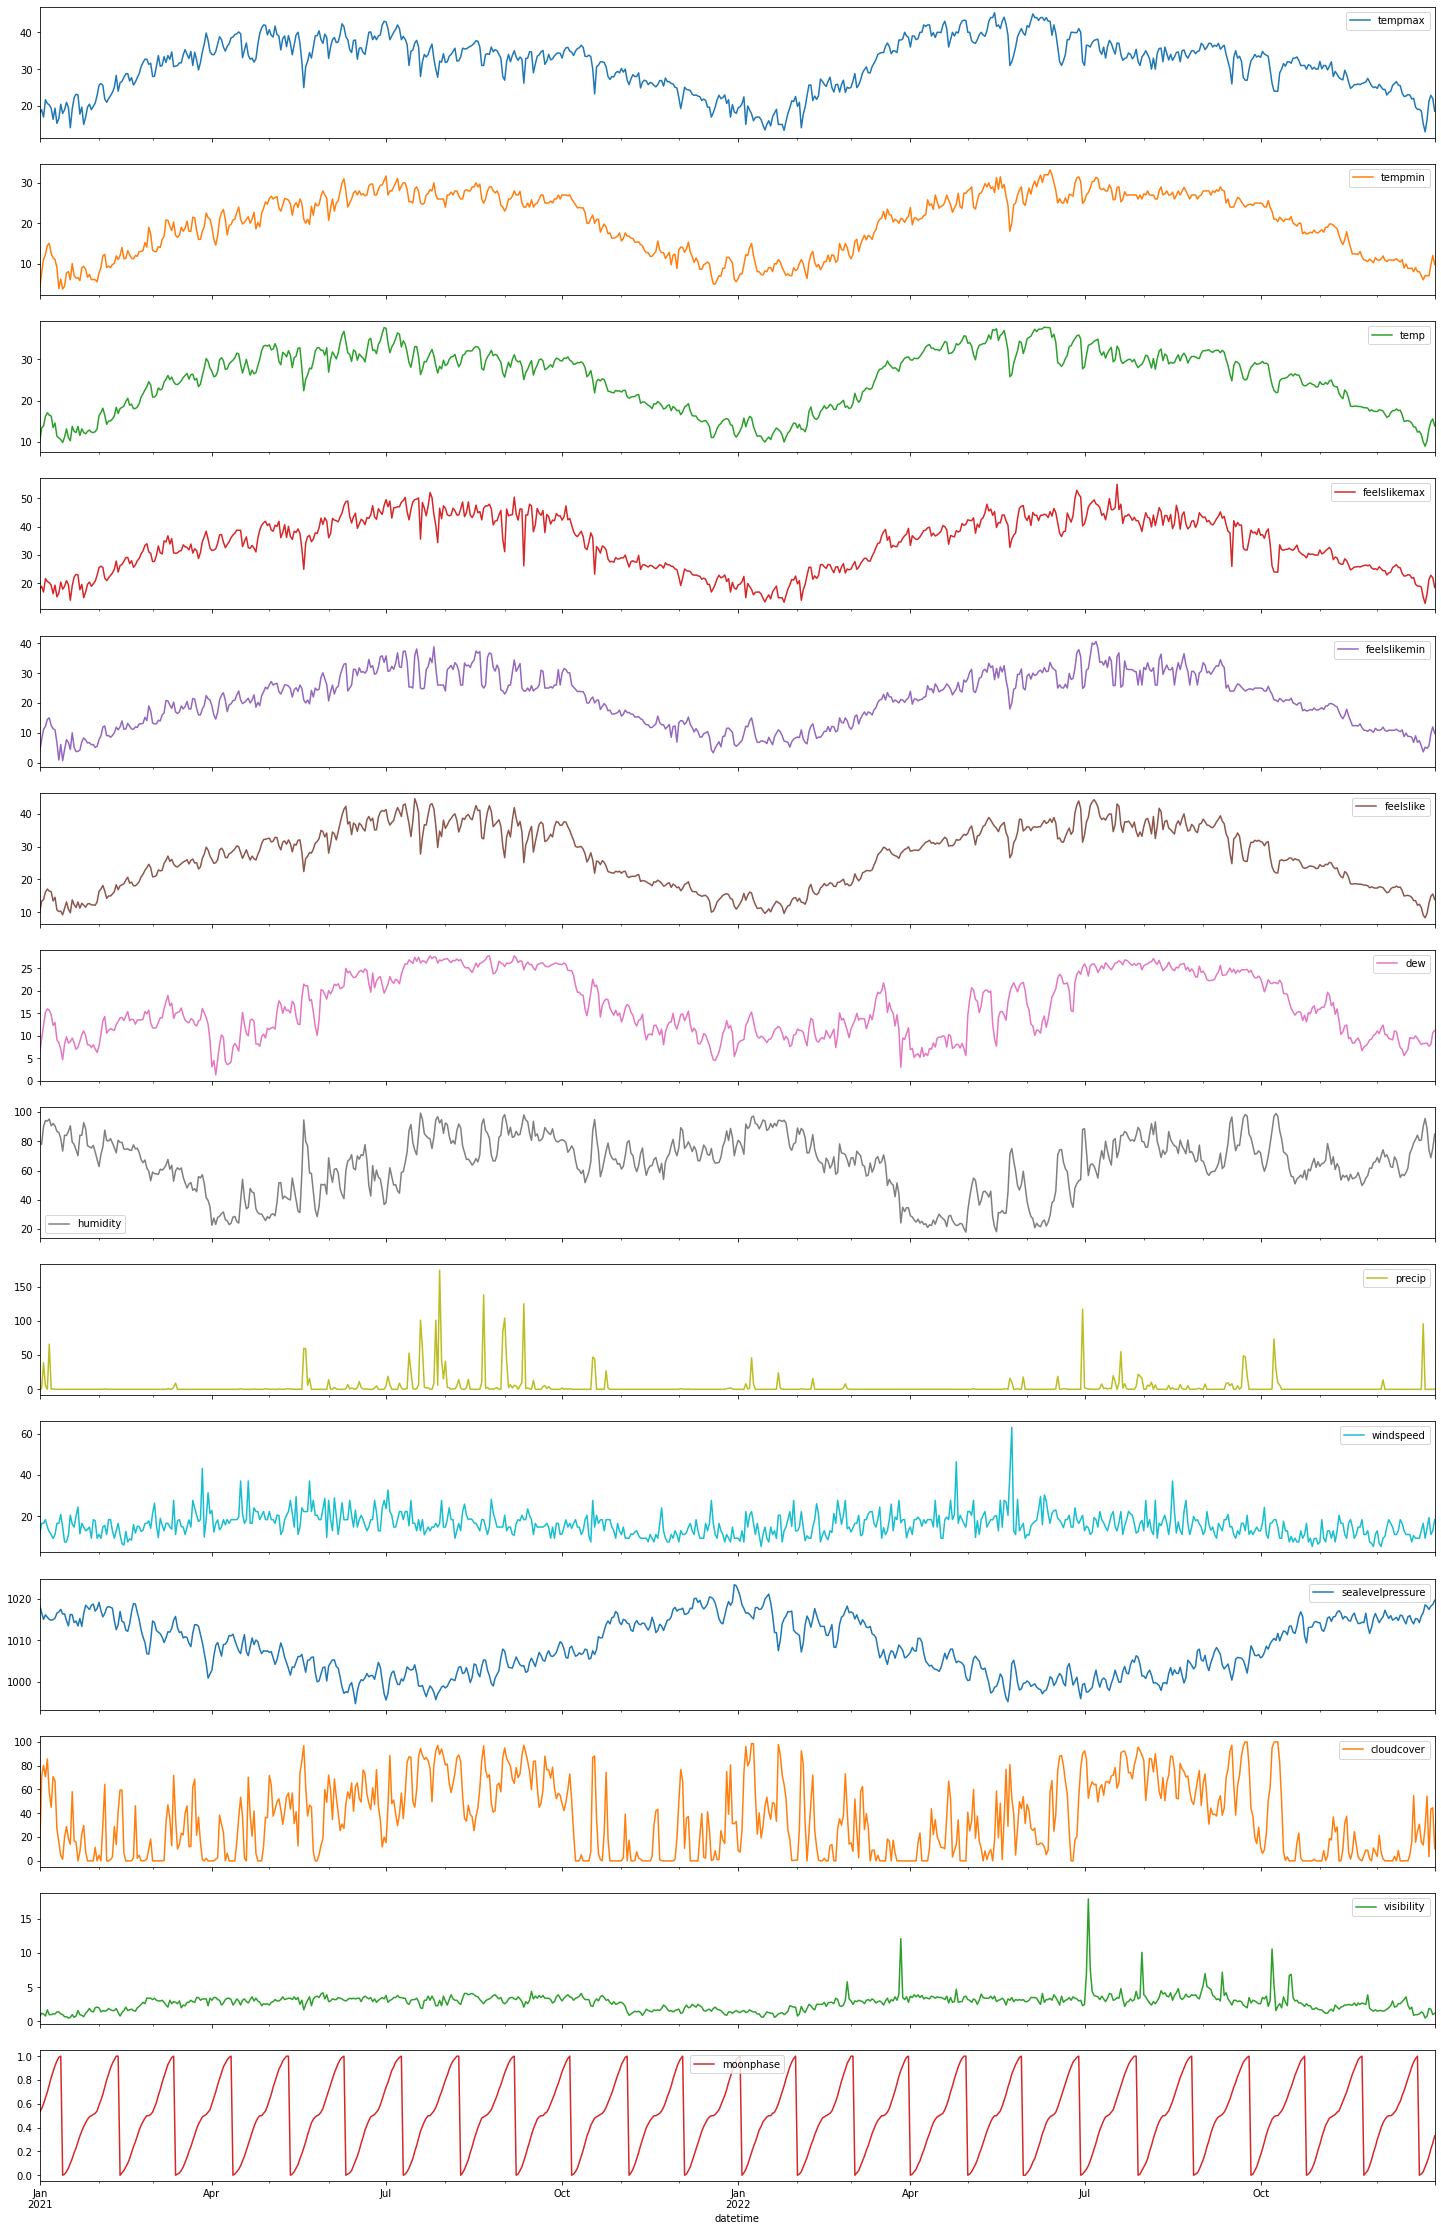

In [13]:
weather_df['2021':'2022'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,40));

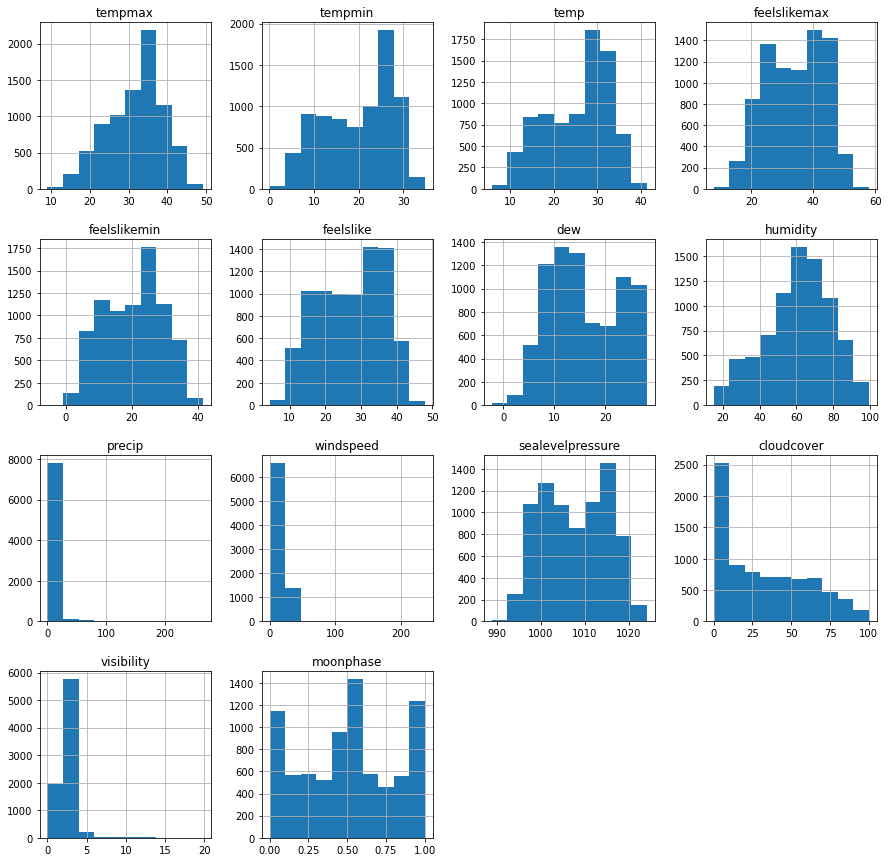

In [14]:
weather_df.hist(bins=10,figsize=(15,15));

In [15]:
weth=weather_df['2021':'2022']
weth.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,moonphase
datetime,,,,,,,,,,,,,,
2021-01-01,18.1,3.7,10.1,18.1,3.7,10.1,6.1,79.0,0.0,11.2,1018.5,6.6,0.7,0.53
2021-01-02,19.0,7.7,13.4,19.0,7.7,13.4,9.3,77.9,1.0,16.6,1016.7,71.0,1.2,0.56
2021-01-03,17.0,11.1,13.9,17.0,11.1,13.9,12.2,90.1,39.0,16.6,1015.1,80.2,1.1,0.60
2021-01-04,21.7,12.2,16.2,21.7,12.2,16.2,15.2,94.2,5.0,18.4,1016.2,70.7,0.8,0.65
2021-01-05,20.7,14.5,17.1,20.7,14.5,17.1,16.0,93.8,0.1,14.8,1015.6,85.6,1.7,0.70


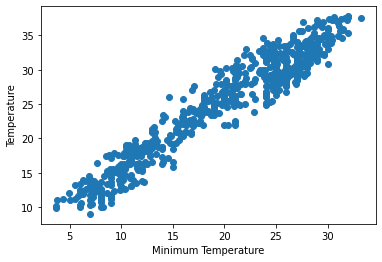

In [16]:
plt.scatter(weth.tempmin, weth.temp)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

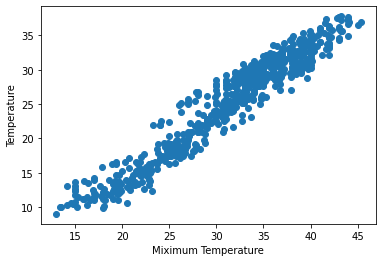

In [17]:
plt.scatter(weth.tempmax, weth.temp)
plt.xlabel("Miximum Temperature")
plt.ylabel("Temperature")
plt.show()

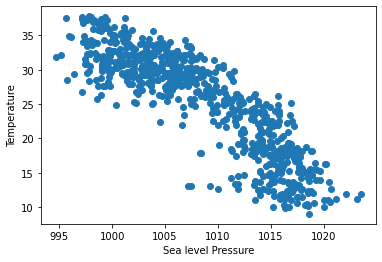

In [18]:
plt.scatter(weth.sealevelpressure, weth.temp)
plt.xlabel("Sea level Pressure")
plt.ylabel("Temperature")
plt.show()

## Now let's split our data in x(features) and y(label)

In [19]:
x = weather_df.drop('temp',axis=1)
y = weather_df.temp

In [20]:
#Building the regression model
from sklearn.model_selection import train_test_split

#For model evaluation `
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [22]:
X_train.shape

(6416, 13)

In [23]:
y_train.shape

(6416,)

In [24]:
#Importing the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
#Put models in a dictionary
model = {"Linear Regression": LinearRegression(),
         "Decision Tree": DecisionTreeRegressor(random_state=0),
        "Random Forest": RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(model,X_train,X_test,y_train,y_test)

In [27]:
model_scores

{'Linear Regression': 0.9968402807170208,
 'Decision Tree': 0.9978573327405849,
 'Random Forest': 0.9988308337565531}

In [28]:
model_compare = pd.DataFrame(model_scores,index =['r2_score'])
model_compare

,Linear Regression,Decision Tree,Random Forest
r2_score,0.99684,0.997857,0.998831


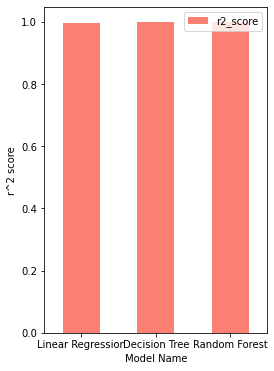

In [29]:
model_compare.T.plot.bar(figsize=(4,6),color='salmon')
plt.xlabel('Model Name')
plt.ylabel('r^2 score')
plt.xticks(rotation=0);

In [30]:
model = RandomForestRegressor().fit(X_train,y_train)

In [31]:
y_preds = model.predict(X_test)

In [32]:
#Model Evaluation
r2_score(y_test,y_preds)

0.998854306587386

In [33]:
mse(y_test,y_preds)

0.06497073769470409

In [34]:
import pickle

# Save an existing model to file
pickle.dump(model, open("weather_forecast_model.pkl", "wb"))

In [35]:
model = pickle.load(open('weather_forecast_model.pkl', 'rb'))